['n07742313', 'Granny_Smith']
['n02948072', 'candle']
['n07720875', 'bell_pepper']
['n07716906', 'spaghetti_squash']
['n07747607', 'orange']


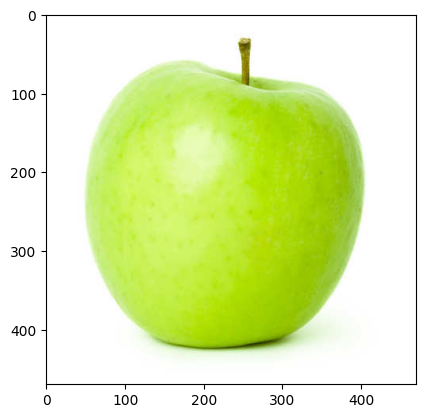

In [33]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json
class_idx = json.load(open("imagenet_class_index.json"))


# Load a pre-trained model inception v3 and use the apth image as input

model = models.inception_v3(pretrained=True)
model.eval()

# Load the image
img = Image.open("granny_smith.jpg")
plt.imshow(img)

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
])

img_tensor = preprocess(img)

# Add a dimension to the image tensor

img_tensor.unsqueeze_(0)

# Get the class labels

with open("imagenet_class_index.json") as f:
    class_idx = json.load(f)

# Get the class labels for the image

output = model(img_tensor)

# Get the top 5 predictions

_, indices = torch.sort(output, descending=True)

# Print the top 5 predictions

for idx in indices[0][:5]:
    print(class_idx[str(idx.item())])

